# Metric: Playgrounds

## We wanted to correlate the amount of playgrounds per neighborhood to how much fun it would be for children.

In [78]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors

In [153]:
##importing playground data through Pittsburgh
play = pd.read_csv('playground.csv')
play.head(10)

,id,name,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1780722587,Able Long Playground,Play Area 2 to 5,Little Tykes,Pour in Place,f,211.0,Coast Ave,Beechview,4,19,42003192000,5,19,6,4-28,40.408381,-80.028520
1,702514290,North Ave. Playground,Play Area 2 to 5,Playworld,SofSurfaces,f,377.0,W North Ave,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454526,-80.010188
2,1267038491,Vietnam Veteran's Playground,Slide,Little Tykes,SofSurfaces,f,108.0,Panther Hollow Rd,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.434185,-79.944323
3,14898932,Schenley Overlook Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432130,-79.947774
4,204832406,Schenley Overlook Playground,Slide,Little Tykes,SofSurfaces,f,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432215,-79.947817
5,788191865,Chartiers Playground,Swing 2 Bays,Little Tykes,SofSurfaces,f,1550.0,Summerdale St,Windgap,2,28,42003563000,5,28,6,1-16,40.456812,-80.075131
6,1387089430,Chartiers Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,3783.0,Chartiers Ave,Windgap,2,28,42003563000,5,28,6,1-16,40.457218,-80.075070
7,1838217886,Chartiers Playground,Play Area 2 to 5,Little Tykes,SofSurfaces,f,3789.0,Chartiers Ave,Windgap,2,28,42003563000,5,28,6,1-16,40.457329,-80.075145
8,1315630398,Chartiers Playground,Play Area 5 to 12,Little Tykes,SofSurfaces,f,1544.0,Summerdale St,Windgap,2,28,42003563000,5,28,6,1-16,40.456681,-80.075019
9,1603952265,Chartiers Playground,Whirl,NaN,SofSurfaces,f,1548.0,Summerdale St,Windgap,2,28,42003563000,5,28,6,1-16,40.456970,-80.075110


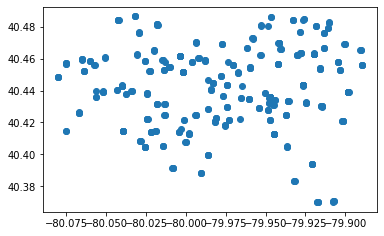

In [66]:
play = pd.read_csv('playground.csv')
play_geo = geopandas.GeoDataFrame(play, geometry = geopandas.points_from_xy(play['longitude'], play['latitude'])) 
play_geo.plot() 

This will show us the coordinates for each playground located in the Pittsburgh neighborhoods.

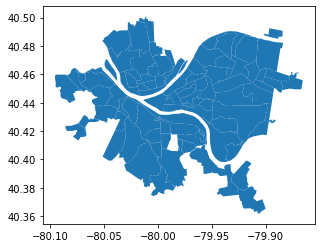

In [141]:
neighbor_map = geopandas.read_file('Neighborhoods_.shp')
neighbor_map.plot()

In [143]:
neighborhoods = pd.read_csv("Neighborhood.csv", sep = ",")
neighborhoods.head(5)

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,page_number,plannerassign,globalid,created_user,created_date,last_edited_user,last_edited_date,temp,shape_area,shape_length
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,15,Ose Akinlotan,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,SDE,2020-08-14T12:57:28,SDE,2020-08-14T13:02:13,NaN,8.153647e+06,14047.065024
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,15,Ose Akinlotan,20d4605b-258e-441a-a57e-a28fdabb6d30,SDE,2020-08-14T12:57:28,SDE,2020-08-14T13:02:41,NaN,3.407739e+07,30347.886823
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,15,Ose Akinlotan,bf4065e7-c29c-48bd-b529-e7fd99077238,SDE,2020-08-14T12:57:28,SDE,2020-08-14T12:59:55,NaN,1.275116e+07,14577.441571
3,4,214,42,003,050900,1,420030509001,Block Group 1,G5030,S,...,15,Ose Akinlotan,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,SDE,2020-08-14T12:57:28,SDE,2020-08-14T12:58:41,NaN,4.997845e+06,14216.959213
4,5,173,42,003,300100,5,420033001005,Block Group 5,G5030,S,...,15,Thomas Scharff,8669d2f0-b886-4519-99d0-bb1015b592b0,SDE,2020-08-14T12:57:28,SDE,2020-08-14T13:00:19,NaN,8.410563e+06,12003.269761


/opt/tljh/user/lib/python3.8/site-packages/geopandas/plotting.py:373: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


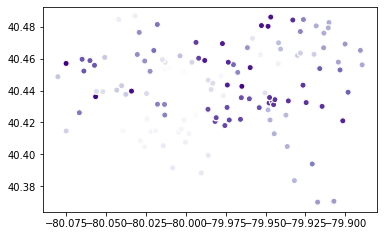

In [152]:
play = pd.read_csv('playground.csv')
play_geo = geopandas.GeoDataFrame(play, geometry = geopandas.points_from_xy(play['longitude'], play['latitude'])) 
play_geo.plot(column ='neighborhood',
             cmap = 'Purples',
                edgecolor = 'white',
                missing_kwds = {'color': 'black'}
             )

In [144]:
amount = play['neighborhood'].value_counts()  #
amount.head(20)

Squirrel Hill South    32
East Liberty           26
Beechview              21
Allegheny Center       15
South Side Slopes      14
Hazelwood              13
Sheraden               13
Elliott                11
Squirrel Hill North    10
Mount Washington       10
Highland Park          10
Beltzhoover            10
Lincoln Place           9
Garfield                9
South Oakland           9
Regent Square           9
Brighton Heights        8
Fineview                8
Crawford-Roberts        8
Troy Hill               7
Name: neighborhood, dtype: int64

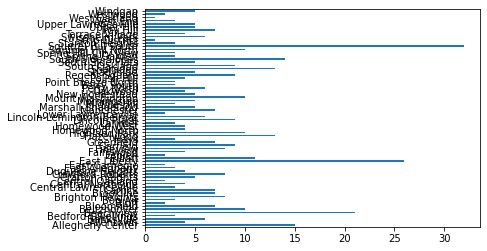

In [145]:
play['neighborhood'].value_counts().sort_index().plot.barh(y = 'neighbhorhood')

Filter down to top neighborhoods

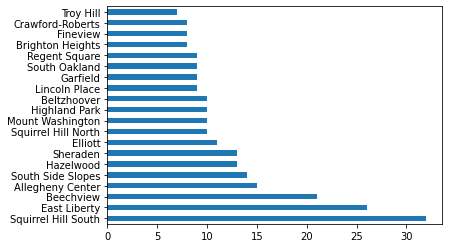

In [146]:
graph = amount.loc['Squirrel Hill South': "Troy Hill"]
graph.plot.barh(y = 'neighborhood')

Squirrel Hill South is deemed the winner for the playgrounds metric with a total of 32 recorded playgrounds.